# Imports

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_style('ticks')

# Paths

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data')

# Read File

In [3]:
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), parse_dates=['datetime'])

In [11]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [19]:
temp = df_train.groupby(['season', 'workingday'])['count'].mean()

In [22]:
temp_ = df_train.groupby(['season', 'workingday'], as_index=False)['count'].mean()

# Datetime

In [43]:
test = df_train['datetime'].dt.dayofweek

In [44]:
blub = df_train['datetime'].dt.day_name()

In [39]:
df_train['day'] = df_train['datetime'].dt.day_name()

# EDA

In [45]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


## 1. Counts weekend vs working day differentiated by season

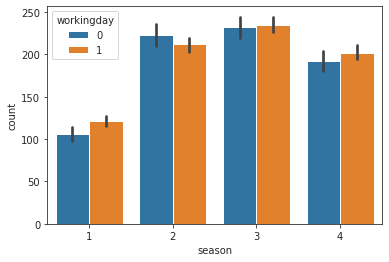

In [42]:
sns.barplot(x='season', y='count', hue='workingday', data=df_train)

## 2. Counts dependent on weather

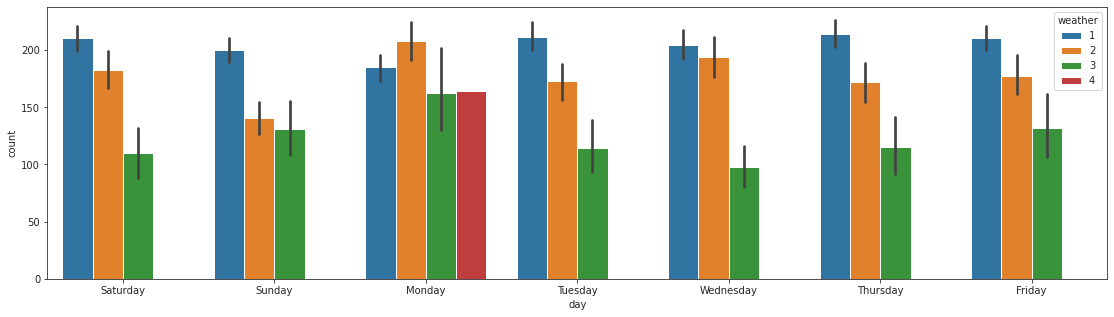

In [55]:
plt.figure(figsize=(19, 5))
sns.barplot(x='day', y='count', hue='weather', data=df_train)

## 3. Counts dependent on weather

In [83]:
df_train_melted.head()

,count,workingday,variable,value
0,16,0,casual,3
1,40,0,casual,8
2,32,0,casual,5
3,13,0,casual,3
4,1,0,casual,0


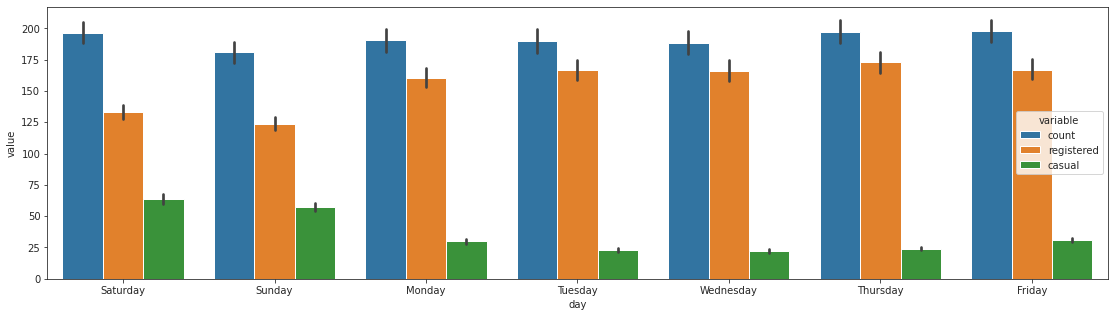

In [106]:
df_train_melted = pd.melt(df_train, id_vars=['day'], value_vars=['count', 'registered', 'casual'])
df_train_melted.head()
plt.figure(figsize=(19, 5))
sns.barplot(x='day', y='value', hue='variable', data=df_train_melted)

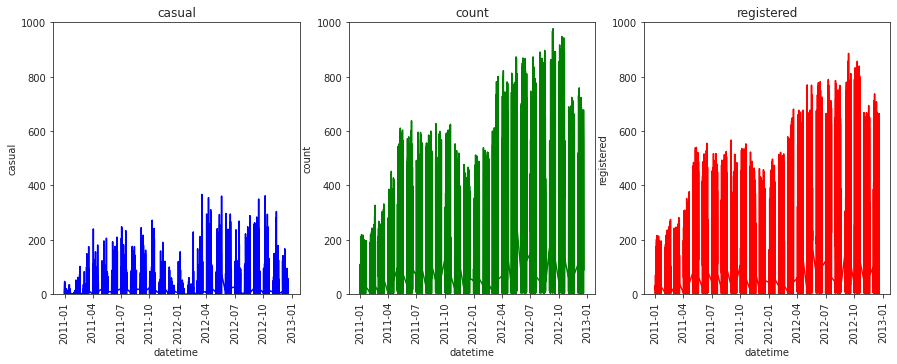

In [108]:
feature = ['casual', 'count', 'registered']
color = ['blue', 'green', 'red']
time = df_train['datetime']
plt.figure(figsize=(15, 5))
for idx, (f, c) in enumerate(zip(feature, color)):
    plt.subplot(1,3, idx + 1)
    sns.lineplot(x=time,
                 y=df_train[f],
                 color=c)
    plt.title(f)
    plt.ylim((0, 1000))
    plt.xticks(rotation=90)


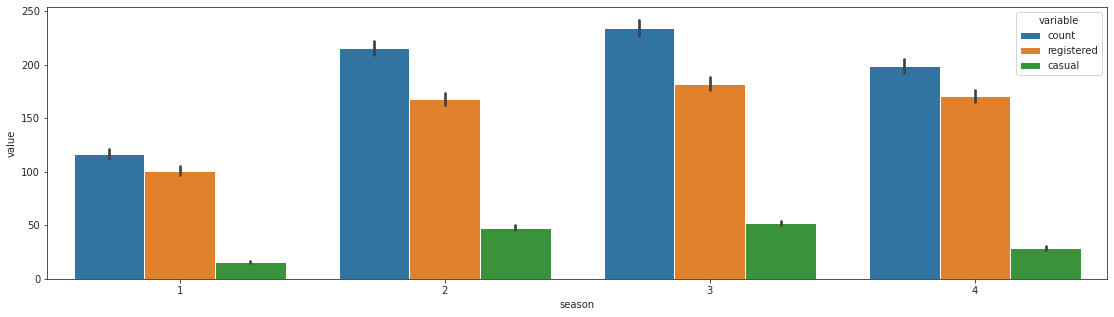

In [109]:
df_train_melted = pd.melt(df_train, id_vars=['day', 'season'], value_vars=['count', 'registered', 'casual'])
df_train_melted.head()
plt.figure(figsize=(19, 5))
sns.barplot(x='season', y='value', hue='variable', data=df_train_melted)

In [110]:
exercise = sns.load_dataset("exercise")

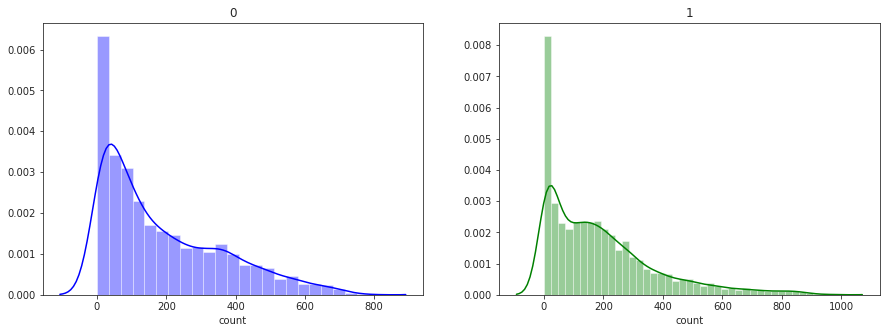

In [118]:
feature = df_train['workingday'].unique()
plt.figure(figsize=(15, 5))
for idx, (f, c) in enumerate(zip(feature, color)):
    plt.subplot(1,2, idx + 1)
    sns.distplot(df_train[df_train['workingday'] == f]['count'],
                 color=c)
    plt.title(f)

In [112]:
feature = df_train['workingday'].unique()

In [113]:
feature

array([0, 1])

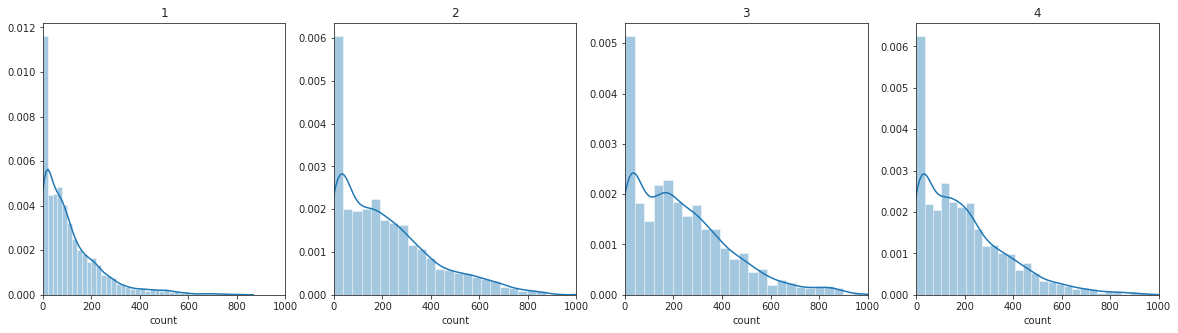

In [131]:
feature = df_train['season'].unique()
plt.figure(figsize=(20, 5))
for idx, f in enumerate(feature):
    plt.subplot(1,4, idx + 1)
    sns.distplot(df_train[df_train['season'] == f]['count'])
    plt.xlim(0, 1000),
    rug=True
    plt.title(f)

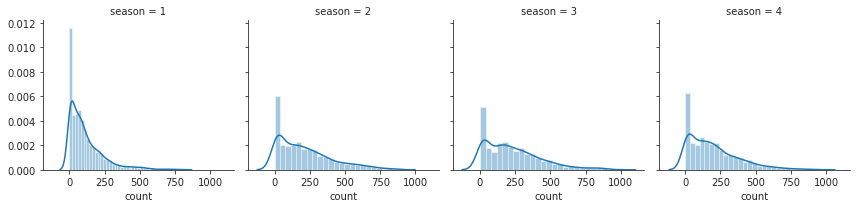

In [138]:
g = sns.FacetGrid(col='season',
                  data=df_train)

g.map(sns.distplot, 'count')

In [124]:
feature

array([1, 2, 3, 4])

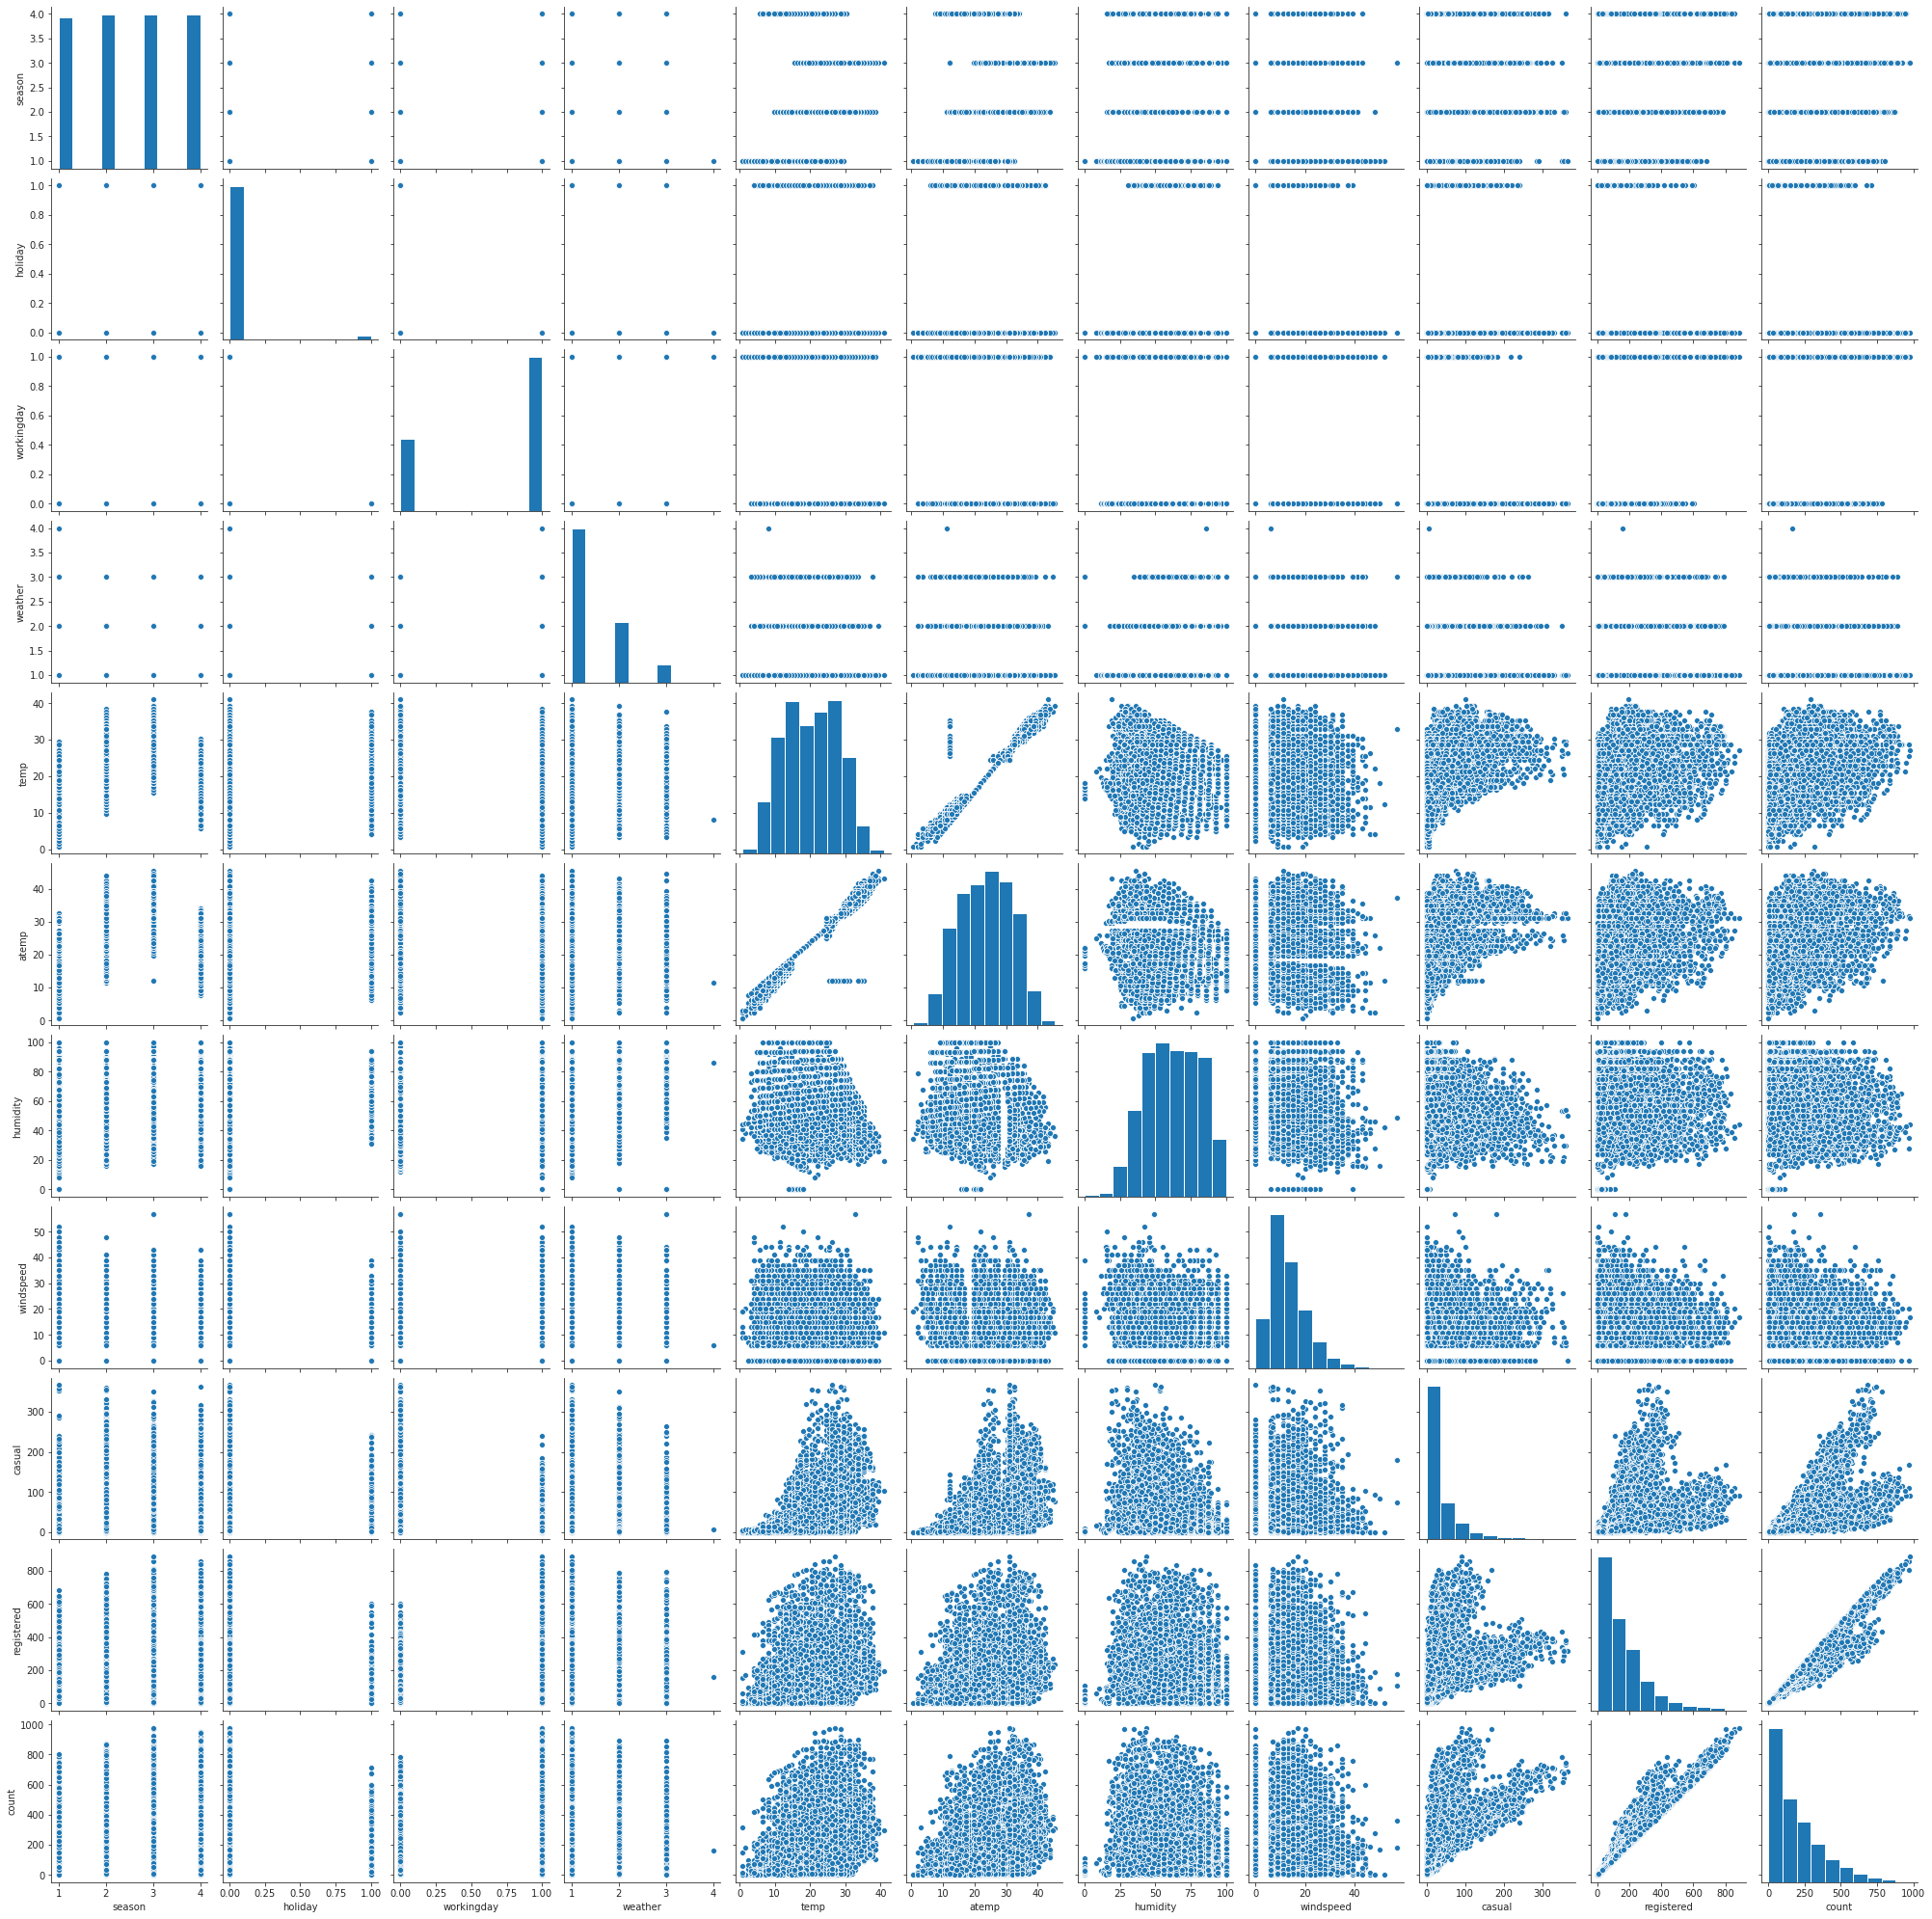

In [139]:
sns.pairplot(df_train)

In [140]:
b = 1
w1 = 3
yhat = b + w1*x

NameError: name 'x' is not defined

In [141]:
import numpy as np

# Evaluation Metric for Regression

In [200]:
import math
import numpy as np
import pandas as pd

In [ ]:
y = pd.Series([5, 5, 100, 100, 1000, 1000])
yhat = pd.Series([3, 100, 90, 1000, 980, 10000])

## Mean squared error

In [154]:
def my_mse(y, yhat):
    """
    Implements Mean Squared Error metric
    
    """
    return np.mean(((y - yhat)) ** 2)

In [158]:
print(f'sklean solution: {mean_squared_error(y, yhat):.2f}')
print(f'My solution: {my_mse(y, yhat):.2f}')

sklean solution: 13636588.17
My solution: 13636588.17


## Root Mean squared Error

In [202]:
def my_rmse(y, yhat):
    """
    Implements Root Mean Squared Error metric
    
    """
    
    return my_mse(y, yhat) ** (1/2)

In [203]:
print(f'sklean solution: {mean_squared_error(y, yhat, squared=False):.2f}')
print(f'My solution: {my_rmse(y, yhat):.2f}')

sklean solution: 3692.78
My solution: 3692.78


## Root Mean Squared Log Error metric

In [183]:
from sklearn.metrics import mean_squared_log_error

In [197]:
def my_rmsle(y, yhat):
    """
    Implements Root Mean Squared Log Error metric
    
    """
    rmsle = np.sqrt(np.mean((np.log(y + 1) - np.log(yhat + 1)) ** 2))
    
    return rmsle

In [198]:
print(f'my solution: {my_rmsle(y, yhat):.2f}')
print(f'sklearn: {np.sqrt(mean_squared_log_error(y, yhat)):.2f}')

my solution: 1.77
sklearn: 1.77


## Mean absolut Error metric

In [204]:
from sklearn.metrics import mean_absolute_error

In [210]:
def my_mae(y, yhat):
    """
    Implements Mean absolut Error metric
    
    """
    mae = np.mean(abs(y-yhat))
    return mae

In [211]:
print(f'my solution: {my_mae(y, yhat):.2f}')
print(f'sklearn: {mean_absolute_error(y, yhat):.2f}')

my solution: 1671.17
sklearn: 1671.17
